MOONIKA SANAPATI

A project for an internship at "CODERSCAVE"

phase 1 normal task - Exploratory Data Analysis - Terrorism

DOMAIN - Data Science  

BATCH - AUGUST BATCH 2



IMPORTING **LIBRARIES**

In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import os

In [ ]:
from google.colab import drive

Adding CSV file from google drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/archive/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

In [ ]:
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
dataset.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [ ]:
dataset=dataset[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
dataset.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [ ]:
dataset.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [ ]:
dataset.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [ ]:
print("Country with the most attacks:",dataset['Country'].value_counts().idxmax())
print("City with the most attacks:",dataset['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",dataset['Region'].value_counts().idxmax())
print("Year with the most attacks:",dataset['Year'].value_counts().idxmax())
print("Month with the most attacks:",dataset['Month'].value_counts().idxmax())
print("Group with the most attacks:",dataset['Group'].value_counts().index[1])
print("Most Attack Types:",dataset['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


TERRORIST ACTIVITIES BY REGION IN EACH YEAR

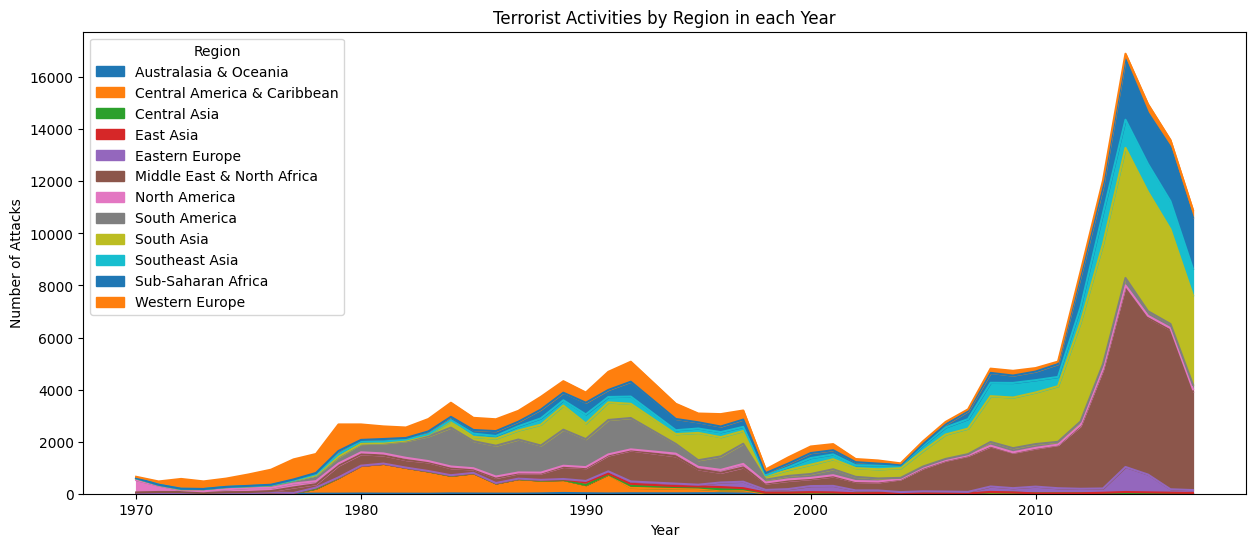

In [ ]:
pd.crosstab(dataset.Year, dataset.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

HISTOGRAM

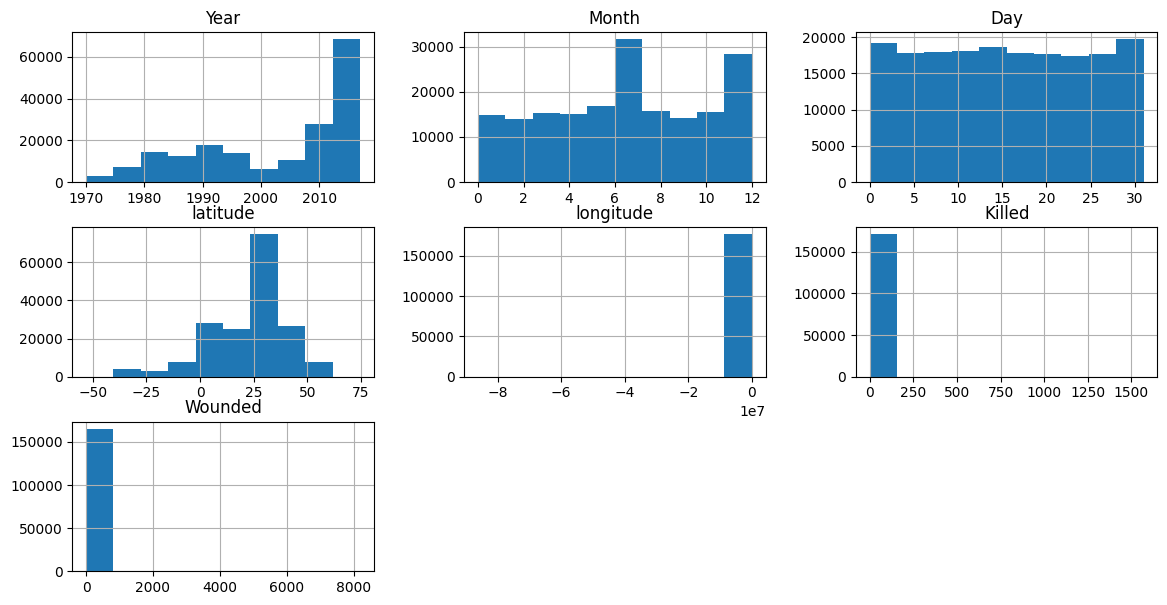

In [ ]:
dataset.hist(figsize=(14,7))
plt.show()

NUMBER OF TERRORIST ACTIVITY IN EACH YEAR

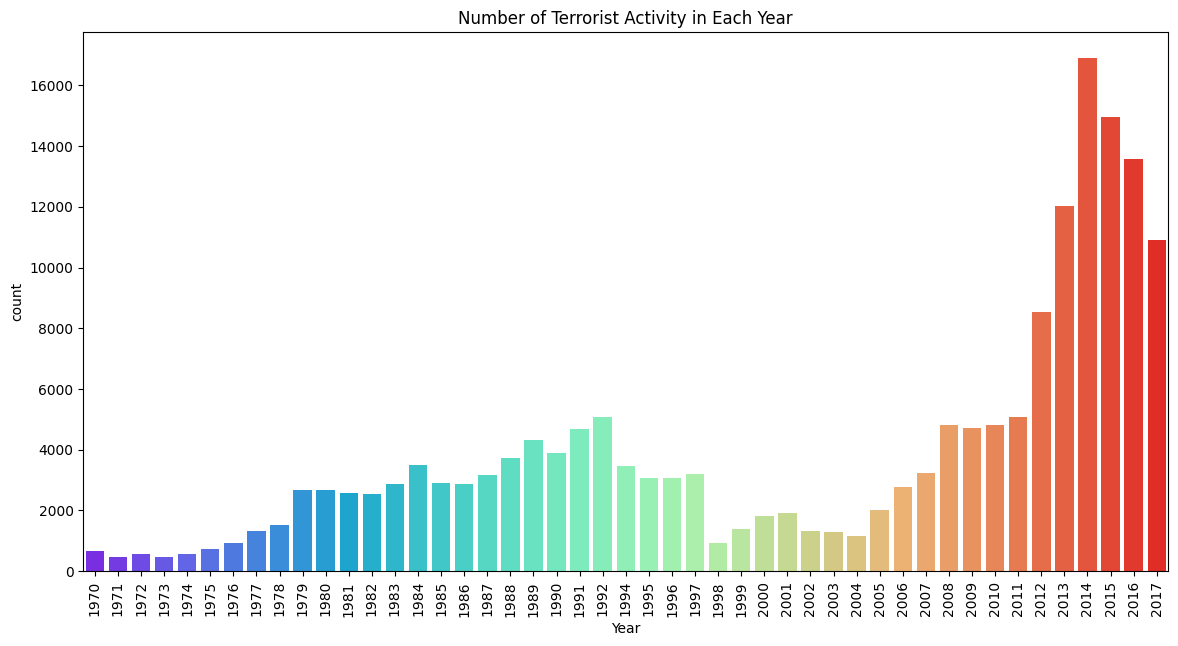

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Year",data=dataset,palette='rainbow')
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activity in Each Year")
plt.xlabel("Year")
plt.show()

TYPE OF ATTACKS

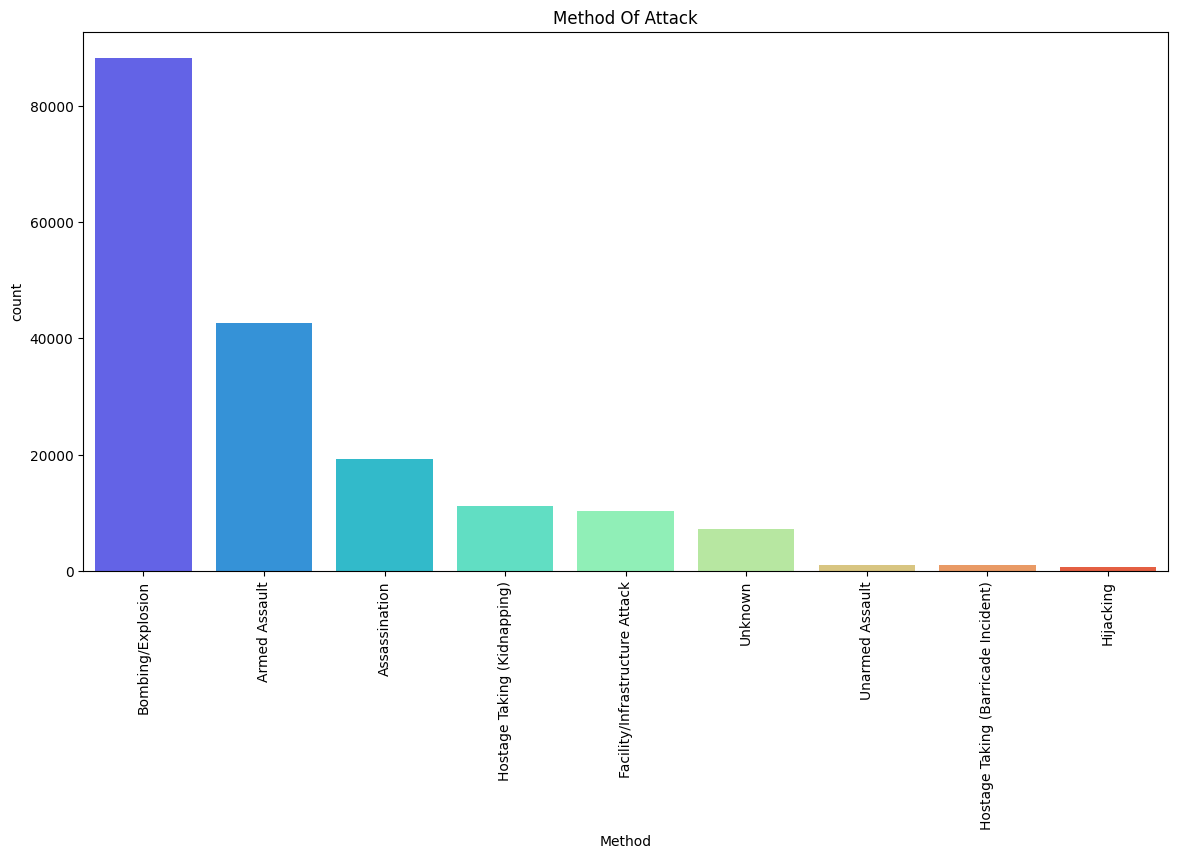

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=dataset['AttackType'],order=dataset['AttackType'].value_counts().index,palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Method")
plt.title("Method Of Attack")
plt.show()


TYPE OF TARGET

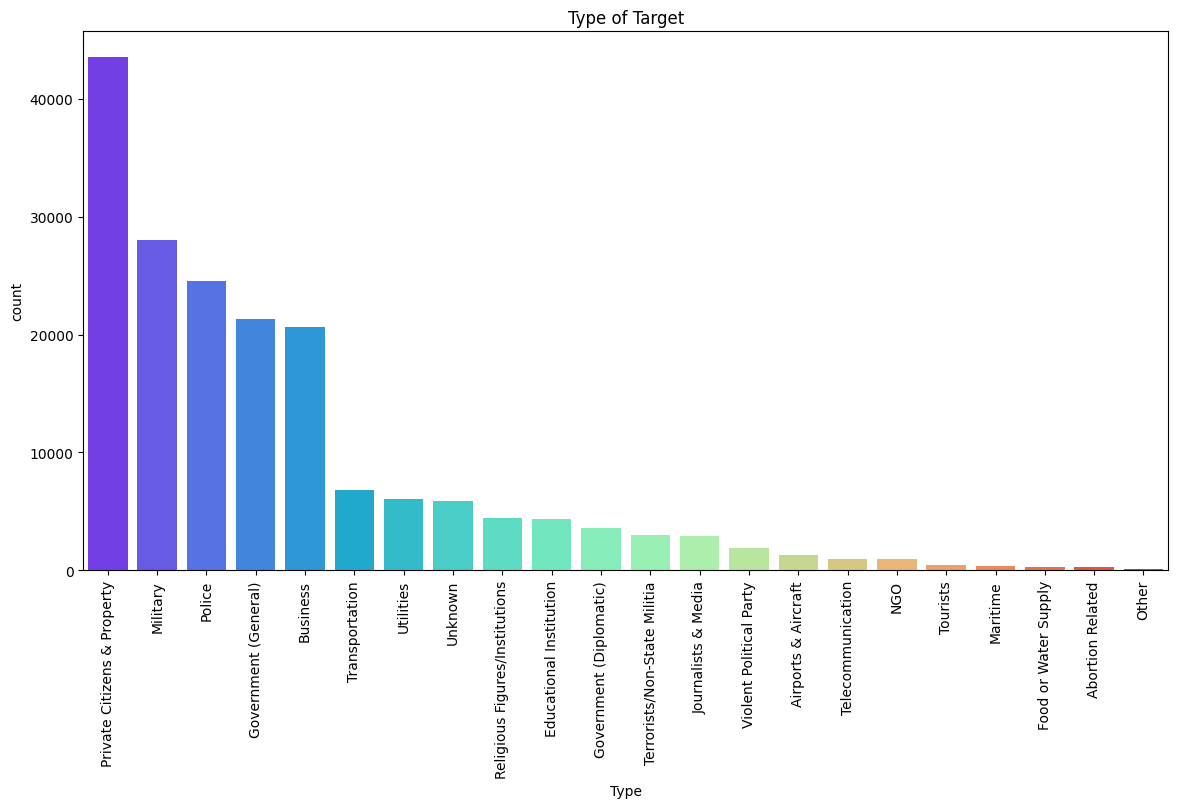

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(x=dataset['Target_type'],order=dataset['Target_type'].value_counts().index,palette="rainbow")
plt.xticks(rotation=90)
plt.xlabel("Type")
plt.title("Type of Target")
plt.show()


TERRORIST ATTACKS PER COUNTRY

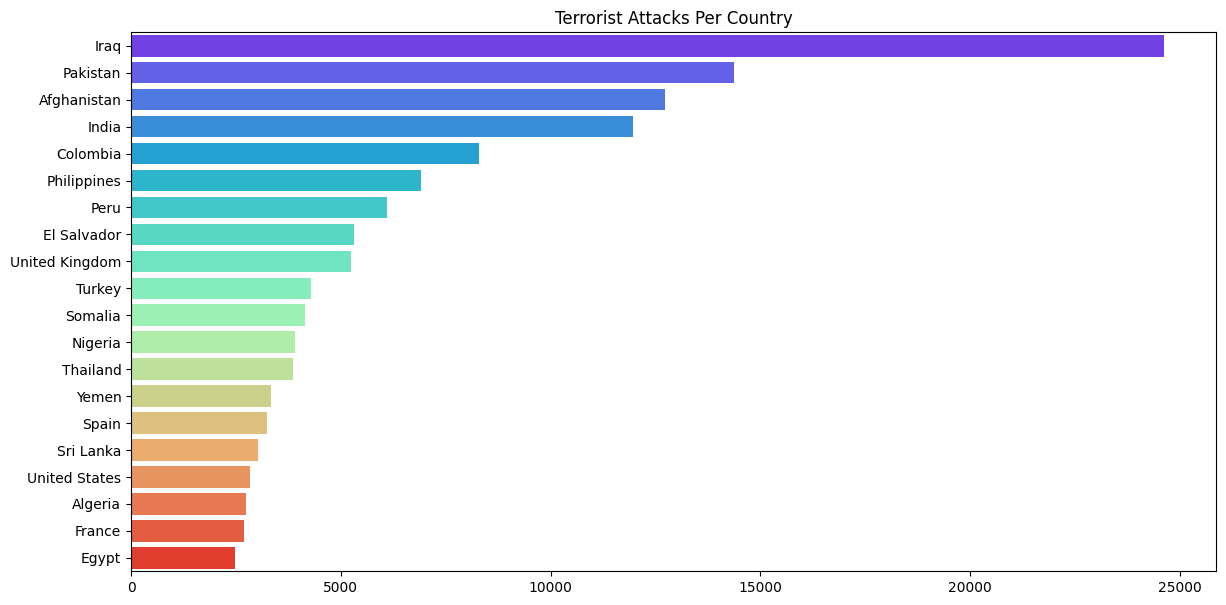

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x = dataset['Country'].value_counts()[:20].values,y=dataset['Country'].value_counts()[:20].index,palette='rainbow')
plt.title("Terrorist Attacks Per Country")
plt.show()



TERRORIST ATTACKS PER REGION

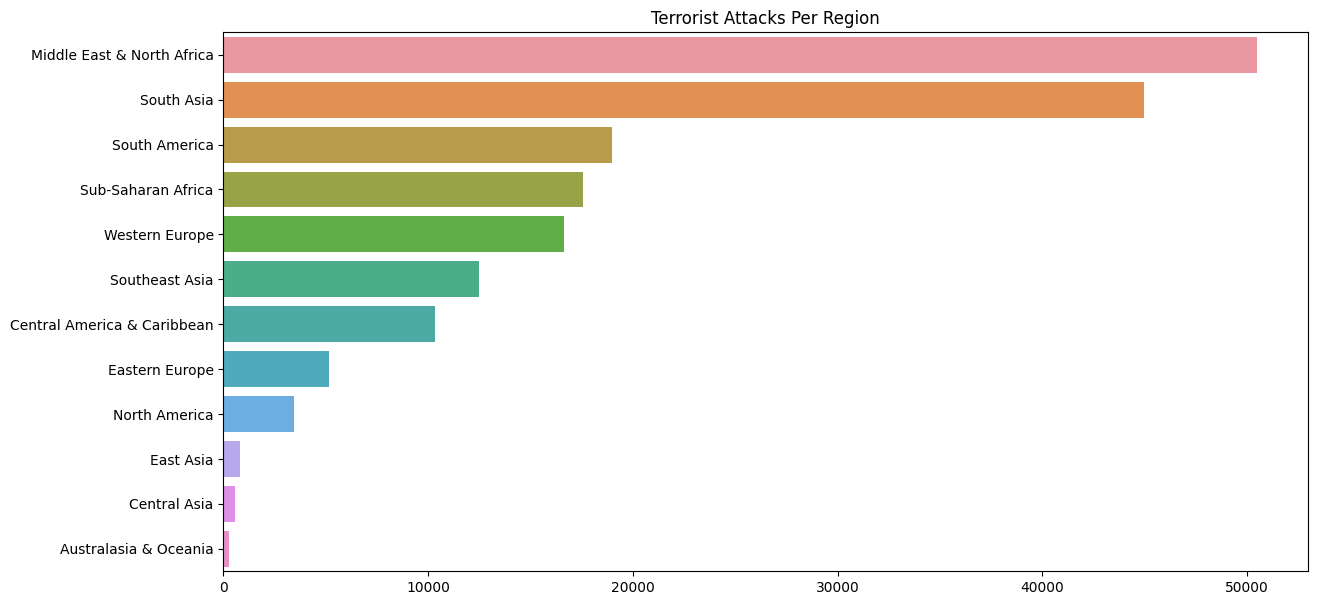

In [ ]:
plt.figure(figsize=(14,7))
sns.barplot(x = dataset['Region'].value_counts().values,y=dataset['Region'].value_counts().index)
plt.title("Terrorist Attacks Per Region")
plt.show()


In [ ]:
terr = dataset.groupby(['Country'],as_index=False).count()

In [ ]:
max_count = terr['Year'].max()
max_id = terr['Year'].idxmax()
max_name = terr['Country'][max_id]
min_count = terr['Year'].min()
min_id = terr['Year'].idxmin()
min_name = terr['Country'][min_id]

In [ ]:
print(f"{max_name} has suffered the maximum number of terror attacks of {max_count}")
print(f"{min_name} has suffered the mininum number of terror attacks of {min_count}")

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the mininum number of terror attacks of 1


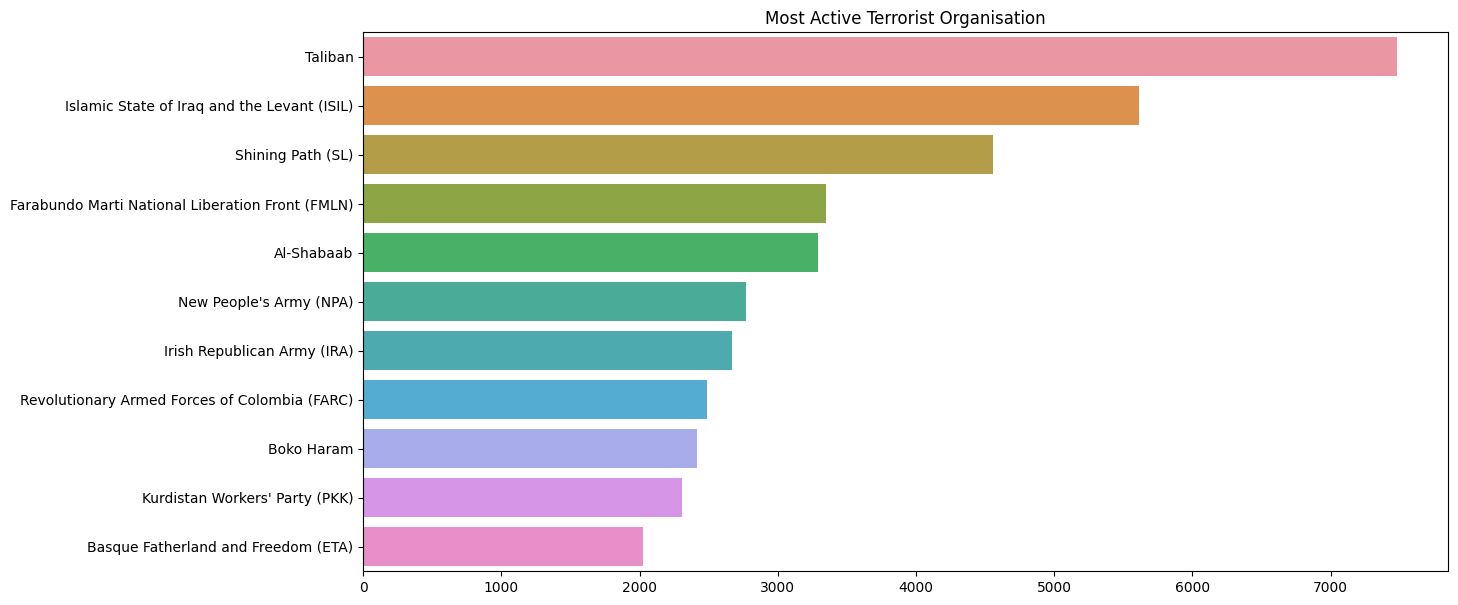

In [ ]:
plt.subplots(figsize=(14,7))
sns.barplot(y=dataset['Group'].value_counts()[1:12].index,x=dataset['Group'].value_counts()[1:12].values)
plt.title("Most Active Terrorist Organisation")
plt.show()

Based on our in-depth analysis of global terrorist activities, we have identified several critical patterns and trends:

Key Findings:

1.Terrorist activities reached their peak in 2014.

2.Bombing/Explosions were the predominant types of attacks.

3.Private citizens and properties emerged as the most frequent targets of these attacks.

4.Iraq experienced the highest number of terrorist incidents.

5.The Middle East and North America were the regions most frequently targeted.

6.The Taliban and ISIL are the foremost active terrorist organizations during the period analyzed.

Conclusion:
These insights have enabled us to formulate solutions tailored to our initial problem statement. Consequently, our data analysis has been successfully completed and offers valuable perspectives on the global state of terrorism during the examined period.







